In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from scipy.stats import loguniform, randint, uniform
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

In [2]:
RANDOM_STATE = 710

In [3]:
bank = pd.read_csv("bank-full.csv", sep=";")
bank.y = bank.y.map({'yes':1, 'no':0})

In [4]:
[col for col in bank.columns if bank[col].dtype == 'category']

[]

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [6]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [7]:
bank.describe()
# include='all'

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [8]:
# drop rows with na
# bank.dropna()

# bank.isna().any()
# bank.isna().sum()
# bank.fillna()

In [9]:
for i in list(bank.columns):
    print(f"{i:<10}->  {bank[i].nunique():<5} unique values")
    

age       ->  77    unique values
job       ->  12    unique values
marital   ->  3     unique values
education ->  4     unique values
default   ->  2     unique values
balance   ->  7168  unique values
housing   ->  2     unique values
loan      ->  2     unique values
contact   ->  3     unique values
day       ->  31    unique values
month     ->  12    unique values
duration  ->  1573  unique values
campaign  ->  48    unique values
pdays     ->  559   unique values
previous  ->  41    unique values
poutcome  ->  4     unique values
y         ->  2     unique values


In [10]:
bank.job.value_counts(ascending=False)

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [11]:
X = bank.drop(columns=["y", 'pdays', 'poutcome', 'day', 'month', 'campaign', 'previous', 'default', 'housing', 'contact'])
y = bank["y"]
X_train, X_test, y_train, y_test = train_test_split(X
                                                    , y
                                                    , test_size=0.3
                                                    , random_state=RANDOM_STATE
                                                    , stratify=y)

In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31647 entries, 20111 to 19059
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        31647 non-null  int64 
 1   job        31647 non-null  object
 2   marital    31647 non-null  object
 3   education  31647 non-null  object
 4   balance    31647 non-null  int64 
 5   loan       31647 non-null  object
 6   duration   31647 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.9+ MB


<Axes: ylabel='Frequency'>

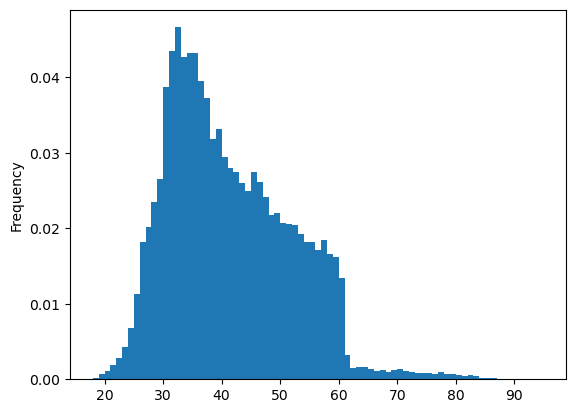

In [13]:
X_train['age'].plot(kind = 'hist', bins=77, density=True)

<Axes: ylabel='Frequency'>

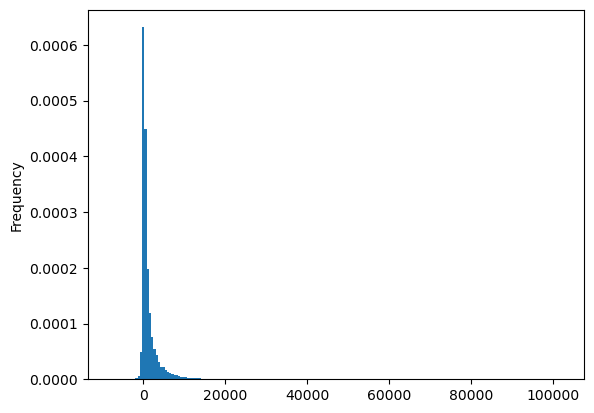

In [14]:
X_train['balance'].plot(kind = 'hist', bins=200, density=True)

<Axes: ylabel='Frequency'>

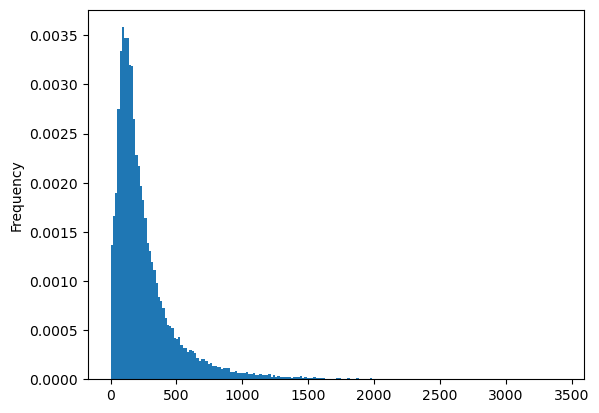

In [15]:
X_train['duration'].plot(kind = 'hist', bins=200, density=True)

<Axes: ylabel='Frequency'>

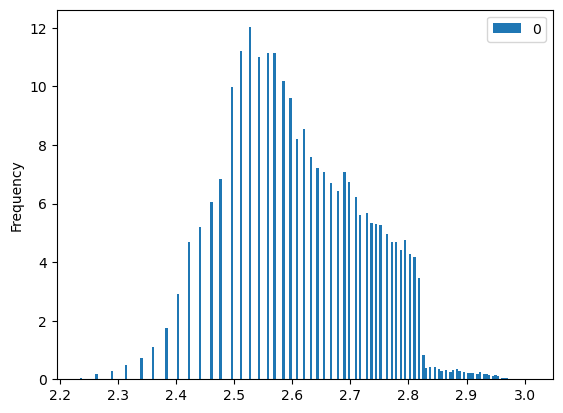

In [52]:
from sklearn.preprocessing import PowerTransformer
log_transformer = PowerTransformer(standardize=False)
pd.DataFrame(log_transformer.fit_transform(X_train[['age']])).plot(kind = 'hist', bins=200, density=True)

#   preprocessing

In [16]:
num_cols = ['age', 'balance', 'duration']
ord_cols = ['education']
cat_cols = [col for col in X.columns if col not in num_cols and col not in ord_cols]
cat_cols


['job', 'marital', 'loan']

In [17]:
from sklearn.preprocessing import PolynomialFeatures
education_levels = ['tertiary', 'secondary', 'primary', 'unknown']
ordinal_transformer = OrdinalEncoder(categories=[education_levels], dtype=int)

numeric_transformer = make_pipeline(PolynomialFeatures(degree=1),StandardScaler())

binary_transformer = make_pipeline(OneHotEncoder(dtype=int, drop='if_binary'))

categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

In [53]:
preprocessor = make_column_transformer(
        (numeric_transformer, num_cols),
        (ordinal_transformer, ord_cols),
        # ('binary', binary_transformer, binary_features),
        (categorical_transformer, cat_cols),
        # ('drop', 'passthrough', drop_features)
    remainder='passthrough'
    )

In [54]:
preprocessor.fit(X_train)
X_train_trans = preprocessor.transform(X_train)
X_test_trans = preprocessor.transform(X_test)
column_names = (
    preprocessor.named_transformers_['standardscaler'].get_feature_names_out().tolist() +
    preprocessor.named_transformers_['ordinalencoder'].get_feature_names_out().tolist() +
    preprocessor.named_transformers_['onehotencoder'].get_feature_names_out().tolist() 
    )
X_train_trans = pd.DataFrame(X_train_trans, columns=column_names)
X_test_trans = pd.DataFrame(X_test_trans, columns=column_names)

<Axes: >

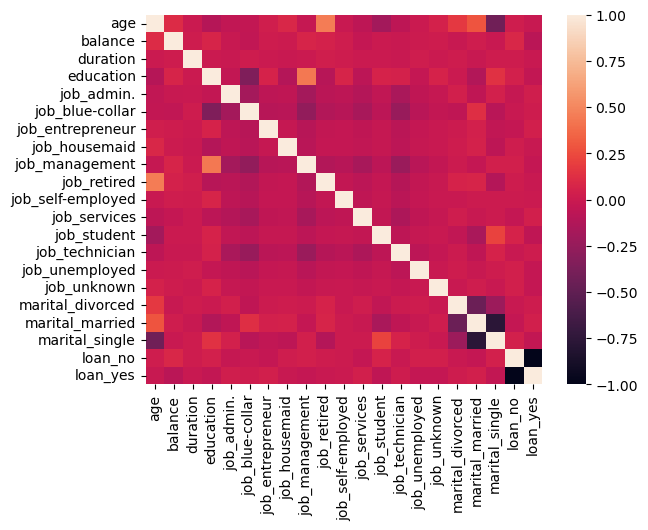

In [55]:
import seaborn as sns
cor = X_train_trans.corr()
sns.heatmap(cor)

In [60]:
cor.style.highlight_between(left=-0.9999, right=-0.7) 

,age,balance,duration,education,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,loan_no,loan_yes
age,1.000000,0.103433,-0.004304,-0.105991,-0.051936,-0.044934,0.023451,0.083073,-0.024496,0.447380,-0.009421,-0.068281,-0.193865,-0.066089,-0.001348,0.049588,0.167574,0.282018,-0.426623,0.017583,-0.017583
balance,0.103433,1.000000,0.015162,0.064095,-0.021226,-0.050432,0.009005,0.002477,0.063825,0.050876,0.016597,-0.037854,-0.000797,-0.013389,0.003903,0.010042,-0.017023,0.023379,-0.013314,0.085154,-0.085154
duration,-0.004304,0.015162,1.000000,-0.001461,-0.012677,0.014315,-0.002304,-0.008902,-0.006922,0.025045,0.007861,-0.002509,-0.005959,-0.013617,0.016958,-0.003806,0.010098,-0.018186,0.012599,0.011660,-0.011660
education,-0.105991,0.064095,-0.001461,1.000000,-0.042765,-0.357246,0.055936,-0.116134,0.431386,-0.097089,0.067856,-0.076798,0.058159,0.049025,-0.037292,0.056469,-0.005781,-0.124589,0.139787,0.044350,-0.044350
job_admin.,-0.051936,-0.021226,-0.012677,-0.042765,1.000000,-0.186457,-0.065569,-0.059083,-0.182287,-0.080507,-0.067223,-0.112633,-0.050888,-0.158522,-0.060856,-0.028229,0.032090,-0.056911,0.039078,-0.025502,0.025502
job_blue-collar,-0.044934,-0.050432,0.014315,-0.357246,-0.186457,1.000000,-0.098068,-0.088366,-0.272636,-0.120410,-0.100541,-0.168459,-0.076111,-0.237093,-0.091018,-0.042220,-0.061894,0.122947,-0.089722,-0.015524,0.015524
job_entrepreneur,0.023451,0.009005,-0.002304,0.055936,-0.065569,-0.098068,1.000000,-0.031075,-0.095874,-0.042343,-0.035356,-0.059240,-0.026765,-0.083375,-0.032007,-0.014847,0.005138,0.044159,-0.051749,-0.033417,0.033417
job_housemaid,0.083073,0.002477,-0.008902,-0.116134,-0.059083,-0.088366,-0.031075,1.000000,-0.086390,-0.038154,-0.031858,-0.053380,-0.024117,-0.075128,-0.028841,-0.013378,0.013803,0.049254,-0.063478,0.018162,-0.018162
job_management,-0.024496,0.063825,-0.006922,0.431386,-0.182287,-0.272636,-0.095874,-0.086390,1.000000,-0.117717,-0.098292,-0.164692,-0.074408,-0.231790,-0.088983,-0.041276,0.003813,-0.035583,0.036025,0.032071,-0.032071
job_retired,0.447380,0.050876,0.025045,-0.097089,-0.080507,-0.120410,-0.042343,-0.038154,-0.117717,1.000000,-0.043411,-0.072736,-0.032862,-0.102370,-0.039299,-0.018229,0.057393,0.069061,-0.116141,0.013109,-0.013109


In [19]:
HGB_preprocessor = make_column_transformer(
        (numeric_transformer, num_cols),
        (ordinal_transformer, ord_cols),
        # ('binary', binary_transformer, binary_features),
        (categorical_transformer, cat_cols),
        # ('drop', 'passthrough', drop_features)
    remainder='passthrough'
    )

In [20]:
linear_preprocessor = make_column_transformer(
        (numeric_transformer, num_cols),
        (ordinal_transformer, ord_cols),
        # ('binary', binary_transformer, binary_features),
        (categorical_transformer, cat_cols),
        # ('drop', 'passthrough', drop_features)
    remainder='passthrough'
    )

In [21]:
baseline = make_pipeline(
    preprocessor,
    DummyClassifier()
)

baseline_result = pd.DataFrame(
    cross_validate(
        baseline,
        X_train,
        y_train,
        cv=10,
        scoring='roc_auc',
        return_train_score=True
    )
)
baseline_result.mean()

fit_time       0.020801
score_time     0.004536
test_score     0.500000
train_score    0.500000
dtype: float64

## RF

In [22]:
RF = make_pipeline(
    preprocessor,
    RandomForestClassifier(random_state=RANDOM_STATE
                           ,max_depth=5)
)

RF_result = pd.DataFrame(
    cross_validate(
        RF,
        X_train,
        y_train,
        cv=10,
        scoring='roc_auc',
        return_train_score=True
    )
)
RF_result.mean()

fit_time       0.684033
score_time     0.013247
test_score     0.839674
train_score    0.848860
dtype: float64

In [23]:
RF.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['tertiary',
                                                                              'secondary',
                                                                              'primary',
                                                                              'unknown']],
                                                                 dtype=<class 'int'>),
                                                  ['education']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['job', 'marital',
                                                   'loan'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5, random_state=710))])

In [24]:
len(RF.named_steps['randomforestclassifier'].estimators_)

100

## HGB

In [25]:
preprocessor.fit_transform(X_train).shape

(31647, 21)

In [26]:

HGB = HistGradientBoostingClassifier(random_state=RANDOM_STATE
                                   , categorical_features=ord_cols+cat_cols)


HGB_result = pd.DataFrame(
    cross_validate(
        HGB,
        X_train,
        y_train,
        cv=10,
        scoring='roc_auc',
        return_train_score=True
    )
)
HGB_result.mean()

fit_time       0.639923
score_time     0.007950
test_score     0.858895
train_score    0.895056
dtype: float64

# para_search

In [27]:
RF.named_steps

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('ordinalencoder',
                                  OrdinalEncoder(categories=[['tertiary',
                                                              'secondary',
                                                              'primary',
                                                              'unknown']],
                                                 dtype=<class 'int'>),
                                  ['education']),
                                 ('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  ['job', 'marital', 'loan'])]),
 'randomforestclassifier': RandomForestClassifier(max_depth=5, random_state=710)}

In [28]:
param_dist = {
    "randomforestclassifier__n_estimators": [50, 100, 200],
    "randomforestclassifier__max_depth":[3, 5, 7, 10],
    "randomforestclassifier__max_features": ["sqrt", "log2"]
}


RF_grid_search = GridSearchCV(RF, 
                             param_dist, 
                             n_jobs=-1, 
                             cv=5,
                             scoring='roc_auc',
                             return_train_score=True
                            )

RF_grid_search.fit(X_train, y_train)

results_RF = pd.DataFrame({
    'mean_test_score': RF_grid_search.cv_results_['mean_test_score'],
    'std_test_score': RF_grid_search.cv_results_['std_test_score'],
    'mean_train_score': RF_grid_search.cv_results_['mean_train_score'],
    'std_train_score': RF_grid_search.cv_results_['std_train_score'],
    'params': RF_grid_search.cv_results_['params']}
)
results_RF

,mean_test_score,std_test_score,mean_train_score,std_train_score,params
0,0.816589,0.010530,0.823713,0.003629,"{'randomforestclassifier__max_depth': 3, 'rand..."
1,0.821719,0.010726,0.828137,0.001195,"{'randomforestclassifier__max_depth': 3, 'rand..."
2,0.825527,0.010260,0.832117,0.001249,"{'randomforestclassifier__max_depth': 3, 'rand..."
3,0.816589,0.010530,0.823713,0.003629,"{'randomforestclassifier__max_depth': 3, 'rand..."
4,0.821719,0.010726,0.828137,0.001195,"{'randomforestclassifier__max_depth': 3, 'rand..."
5,0.825527,0.010260,0.832117,0.001249,"{'randomforestclassifier__max_depth': 3, 'rand..."
6,0.833731,0.009516,0.845739,0.002447,"{'randomforestclassifier__max_depth': 5, 'rand..."
7,0.838975,0.008930,0.850274,0.001515,"{'randomforestclassifier__max_depth': 5, 'rand..."
8,0.839565,0.008366,0.850500,0.002341,"{'randomforestclassifier__max_depth': 5, 'rand..."
9,0.833731,0.009516,0.845739,0.002447,"{'randomforestclassifier__max_depth': 5, 'rand..."


In [29]:
RF_grid_search.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['tertiary',
                                                                              'secondary',
                                                                              'primary',
                                                                              'unknown']],
                                                                 dtype=<class 'int'>),
                                                  ['education']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['job', 'marital',
                                                   'loan'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10, n_estimators=200,
                                        random_state=710))])

In [30]:
RF_grid_search.best_index_

20

In [31]:
RF_grid_search.best_params_

{'randomforestclassifier__max_depth': 10,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__n_estimators': 200}

In [32]:
RF_grid_search.cv_results_

{'mean_fit_time': array([0.47937593, 1.03409643, 2.05395312, 0.60411043, 1.09442439,
        2.0815424 , 0.78377719, 1.29667163, 2.83812675, 0.75668993,
        1.40272098, 2.76814547, 0.88821936, 1.76103287, 3.44552345,
        0.83995204, 1.70997133, 3.26201777, 1.10563898, 2.09399567,
        3.91571698, 1.16412239, 1.92696476, 2.90087914]),
 'std_fit_time': array([0.023173  , 0.1511908 , 0.17821268, 0.10640376, 0.18353688,
        0.19626721, 0.07162516, 0.08699602, 0.21166719, 0.10436907,
        0.11002156, 0.13415515, 0.07123544, 0.25350342, 0.34893146,
        0.08057122, 0.10441659, 0.45278165, 0.11454781, 0.22364785,
        0.27377927, 0.16844942, 0.17658252, 0.07904004]),
 'mean_score_time': array([0.03029933, 0.0351603 , 0.07795978, 0.02739935, 0.0485322 ,
        0.0542973 , 0.04154925, 0.05989552, 0.09268703, 0.03024583,
        0.04459724, 0.09191203, 0.03694186, 0.06869006, 0.11527109,
        0.05238304, 0.06122971, 0.09371772, 0.04272752, 0.0733182 ,
        0.098802

In [33]:
param_dist = {
    # "l2_regularization": loguniform(1e-5, 1e2),
    "max_iter": randint(30, 200),
    "max_depth": randint(3, 20),
    
}

HGB_random_search = RandomizedSearchCV(HGB, 
                                   param_dist, 
                                   n_iter=100, 
                                   n_jobs=-1, 
                                   cv=5,
                                   scoring='roc_auc',
                                   return_train_score=True,
                                   random_state=RANDOM_STATE
                                  )

HGB_random_search.fit(X_train, y_train)

results_HGB = pd.DataFrame({
    'mean_test_score': HGB_random_search.cv_results_['mean_test_score'],
    'std_test_score': HGB_random_search.cv_results_['std_test_score'],
    'mean_train_score': HGB_random_search.cv_results_['mean_train_score'],
    'std_train_score': HGB_random_search.cv_results_['std_train_score'],
    'params': HGB_random_search.cv_results_['params']}
)
prediction = HGB_random_search.predict(X_train)



In [34]:
HGB_random_search.best_params_

{'max_depth': 3, 'max_iter': 99}

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, prediction)

0.8960091003886624

In [36]:
results_HGB.sort_values(by='mean_test_score', ascending=False)

,mean_test_score,std_test_score,mean_train_score,std_train_score,params
10,0.859689,0.004985,0.872768,0.001042,"{'max_depth': 3, 'max_iter': 99}"
99,0.859672,0.004963,0.872852,0.001062,"{'max_depth': 3, 'max_iter': 100}"
59,0.859671,0.005021,0.874678,0.001764,"{'max_depth': 3, 'max_iter': 142}"
15,0.859578,0.004888,0.875079,0.002095,"{'max_depth': 3, 'max_iter': 188}"
2,0.859551,0.005204,0.880259,0.001331,"{'max_depth': 4, 'max_iter': 97}"
...,...,...,...,...,...
17,0.856937,0.004744,0.899141,0.007527,"{'max_depth': 9, 'max_iter': 192}"
8,0.856937,0.004744,0.899141,0.007527,"{'max_depth': 9, 'max_iter': 113}"
92,0.856937,0.004744,0.899141,0.007527,"{'max_depth': 9, 'max_iter': 118}"
62,0.856937,0.004744,0.899141,0.007527,"{'max_depth': 9, 'max_iter': 199}"


# LightGBM

In [37]:
from lightgbm import LGBMClassifier

# Assuming num_cols, ord_cols, and cat_cols are already defined
numeric_transformer = StandardScaler()
ordinal_transformer = OrdinalEncoder()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = make_column_transformer(
    (numeric_transformer, num_cols),
    (ordinal_transformer, ord_cols),
    (categorical_transformer, cat_cols),
    remainder='passthrough'
)

# Define the LightGBM model pipeline
LGBM = make_pipeline(
    preprocessor,
    LGBMClassifier(random_state=RANDOM_STATE, verbose=-1)
)

# Perform cross-validation
LGBM_result = pd.DataFrame(
    cross_validate(
        LGBM,
        X_train,
        y_train,
        cv=10,
        scoring='roc_auc',
        return_train_score=True
    )
)
print(LGBM_result.mean())

# Parameter grid for GridSearchCV
param_dist = {
    "lgbmclassifier__n_estimators": [50, 100, 200],
    "lgbmclassifier__max_depth": [3, 5, 7, 10],
    "lgbmclassifier__num_leaves": [31, 62, 127]
}

# Grid search setup
LGBM_grid_search = GridSearchCV(LGBM, 
                                param_dist, 
                                n_jobs=-1, 
                                cv=5,
                                scoring='roc_auc',
                                return_train_score=True
                               )

# Fit the grid search
LGBM_grid_search.fit(X_train, y_train)
print(LGBM_grid_search.best_score_)
print(LGBM_grid_search.best_params_)


# Collect results
results_LGBM = pd.DataFrame({
    'mean_test_score': LGBM_grid_search.cv_results_['mean_test_score'],
    'std_test_score': LGBM_grid_search.cv_results_['std_test_score'],
    'mean_train_score': LGBM_grid_search.cv_results_['mean_train_score'],
    'std_train_score': LGBM_grid_search.cv_results_['std_train_score'],
    'params': LGBM_grid_search.cv_results_['params']
})

fit_time       0.321397
score_time     0.007611
test_score     0.859004
train_score    0.913533
dtype: float64
0.8609116611379515
{'lgbmclassifier__max_depth': 3, 'lgbmclassifier__n_estimators': 200, 'lgbmclassifier__num_leaves': 31}


In [38]:
print(f"HGB accuracy:{accuracy_score(y_test, HGB_random_search.predict(X_test)):.4f}")
print(classification_report(y_test,  HGB_random_search.predict(X_test), digits=4))


HGB accuracy:0.8856
              precision    recall  f1-score   support

           0     0.9064    0.9707    0.9374     11977
           1     0.5237    0.2432    0.3322      1587

    accuracy                         0.8856     13564
   macro avg     0.7151    0.6070    0.6348     13564
weighted avg     0.8616    0.8856    0.8666     13564



In [39]:
print(f"RF accuracy:{accuracy_score(y_test, RF_grid_search.predict(X_test)):.4f}")
print(classification_report(y_test,  RF_grid_search.predict(X_test), digits=4))

RF accuracy:0.8885
              precision    recall  f1-score   support

           0     0.8998    0.9832    0.9397     11977
           1     0.5786    0.1739    0.2674      1587

    accuracy                         0.8885     13564
   macro avg     0.7392    0.5786    0.6036     13564
weighted avg     0.8622    0.8885    0.8610     13564



In [40]:
print(f"LightGBM accuracy:{accuracy_score(y_test, LGBM_grid_search.predict(X_test)):.4f}")
print(classification_report(y_test,  LGBM_grid_search.predict(X_test), digits=4))

LightGBM accuracy:0.8875
              precision    recall  f1-score   support

           0     0.9077    0.9714    0.9385     11977
           1     0.5408    0.2546    0.3462      1587

    accuracy                         0.8875     13564
   macro avg     0.7243    0.6130    0.6423     13564
weighted avg     0.8648    0.8875    0.8692     13564



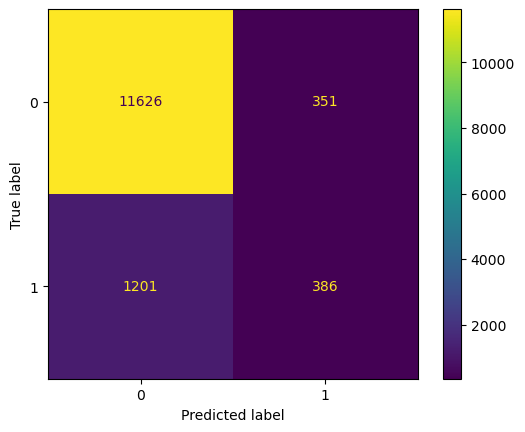

In [41]:
ConfusionMatrixDisplay.from_estimator(HGB_random_search, X_test, y_test)

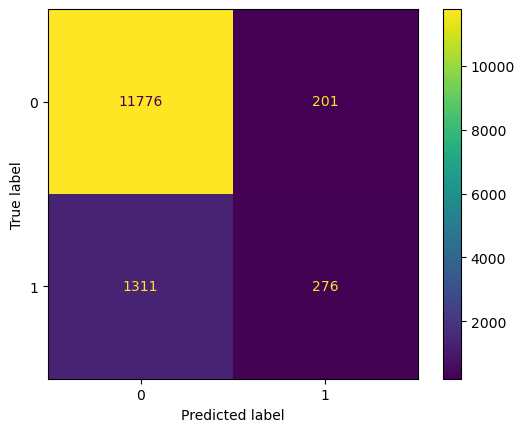

In [42]:
ConfusionMatrixDisplay.from_estimator(RF_grid_search, X_test, y_test)

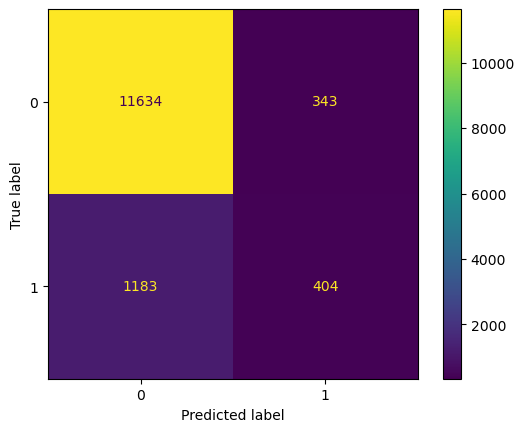

In [43]:
ConfusionMatrixDisplay.from_estimator(LGBM_grid_search, X_test, y_test)

In [44]:
model_dict = {'RF_grid_search': RF_grid_search,
              'HGB_random_search': HGB_random_search,
              'LGBM_grid_search': LGBM_grid_search}
compute_and_plot_roc_curve(X_test, y_test, figsize=(10,10), **model_dict)

NameError: name 'compute_and_plot_roc_curve' is not defined

# feature importance

In [ ]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 ['age', 'balance', 'duration']),
                                ('ordinalencoder', OrdinalEncoder(),
                                 ['education']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['job', 'marital', 'loan'])])

In [ ]:
preprocessor.named_transformers_

{'standardscaler': StandardScaler(),
 'ordinalencoder': OrdinalEncoder(),
 'onehotencoder': OneHotEncoder(handle_unknown='ignore')}

In [ ]:
preprocessor.named_transformers_['onehotencoder'].get_feature_names_out()

array(['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single', 'loan_no',
       'loan_yes'], dtype=object)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

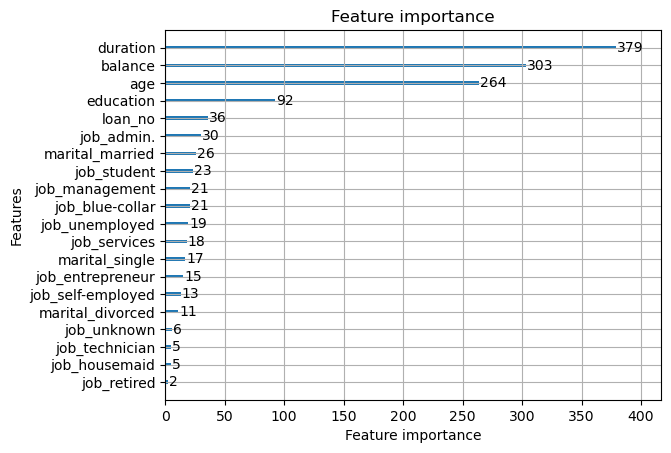

In [ ]:
from lightgbm import plot_importance
X_train_trans = preprocessor.fit_transform(X_train)
column_names = (
    preprocessor.named_transformers_['standardscaler'].get_feature_names_out().tolist() +
    preprocessor.named_transformers_['ordinalencoder'].get_feature_names_out().tolist() +
    preprocessor.named_transformers_['onehotencoder'].get_feature_names_out().tolist() 
    )
X_train_trans = pd.DataFrame(X_train_trans, columns=column_names)
lgbm = LGBMClassifier(random_state=RANDOM_STATE
                      , verbose=-1
                      , max_depth=3
                      , n_estimators=200
                      , num_leaves=31)
lgbm.fit(X_train_trans, y_train)
plot_importance(lgbm)

In [ ]:
RF.named_steps

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('ordinalencoder',
                                  OrdinalEncoder(categories=[['tertiary',
                                                              'secondary',
                                                              'primary',
                                                              'unknown']],
                                                 dtype=<class 'int'>),
                                  ['education']),
                                 ('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  ['job', 'marital', 'loan'])]),
 'randomforestclassifier': RandomForestClassifier(max_depth=5, random_state=710)}

<Axes: xlabel='features'>

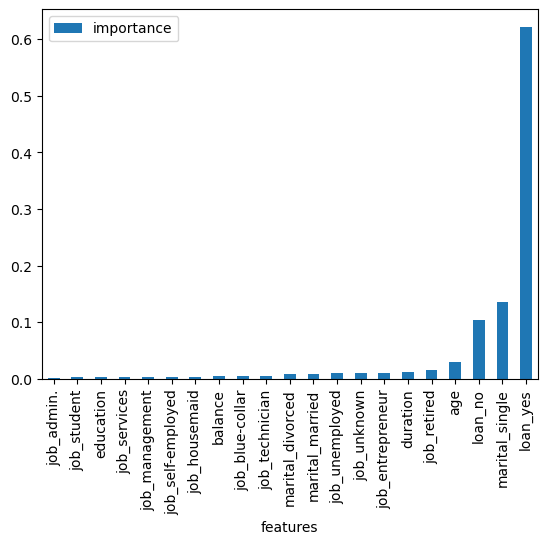

In [ ]:
pd.DataFrame({'features':column_names,
    'importance':RF_grid_search.best_estimator_.named_steps['randomforestclassifier'].feature_importances_}).sort_values(by='importance').plot.bar(x='features')

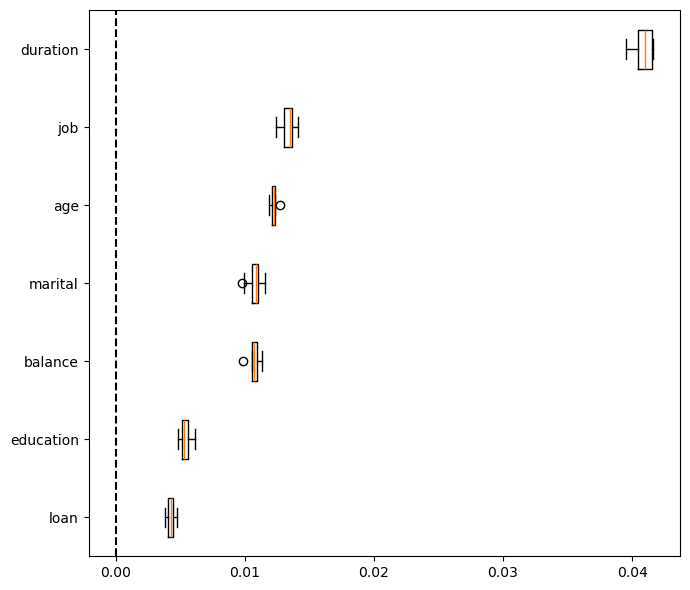

In [ ]:
plot_permutation_importance(RF_grid_search.best_estimator_, X_train, y_train)

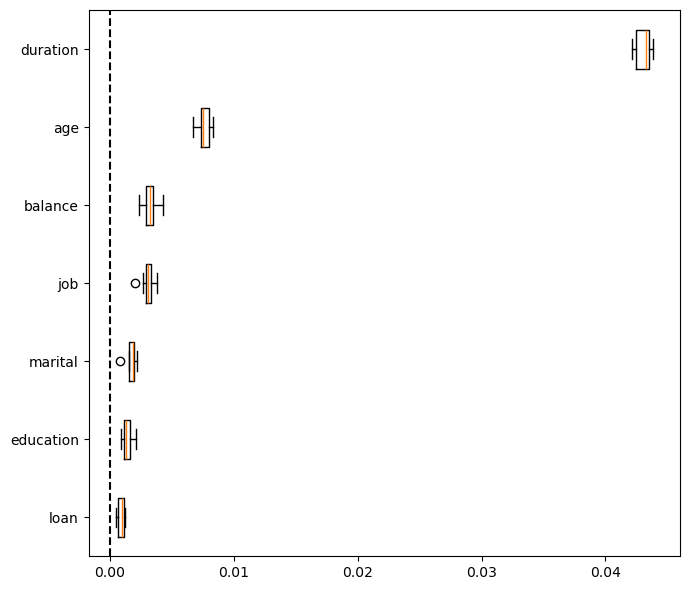

In [ ]:
plot_permutation_importance(LGBM_grid_search.best_estimator_, X_train, y_train)

In [ ]:
RF_grid_search.best_estimator_[-1]

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=710)

In [ ]:
import shap
explainer = shap.Explainer(RF_grid_search.best_estimator_[-1])
shap_values = explainer.shap_values(X_train_trans)
shap_values

array([[[ 0.00560909, -0.00560909],
        [ 0.00079281, -0.00079281],
        [-0.00170312,  0.00170312],
        ...,
        [-0.05133527,  0.05133527],
        [ 0.01948731, -0.01948731],
        [ 0.06005008, -0.06005008]],

       [[ 0.00656921, -0.00656921],
        [-0.00452646,  0.00452646],
        [-0.00260622,  0.00260622],
        ...,
        [-0.0538353 ,  0.0538353 ],
        [ 0.02812566, -0.02812566],
        [ 0.06681738, -0.06681738]],

       [[-0.00995051,  0.00995051],
        [ 0.00012765, -0.00012765],
        [-0.00230902,  0.00230902],
        ...,
        [-0.05162399,  0.05162399],
        [ 0.02366395, -0.02366395],
        [ 0.06346511, -0.06346511]],

       ...,

       [[ 0.00713435, -0.00713435],
        [-0.00451523,  0.00451523],
        [-0.00214436,  0.00214436],
        ...,
        [-0.05546672,  0.05546672],
        [ 0.02520221, -0.02520221],
        [ 0.06357648, -0.06357648]],

       [[-0.0009442 ,  0.0009442 ],
        [ 0.00040523, -0.00

In [ ]:
X_train_trans

,age,balance,duration,education,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,loan_no,loan_yes
0,0.949347,-0.320804,-0.851937,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.420501,1.342617,-0.025240,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-1.123731,-0.446351,-0.606268,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,-0.181423,-0.148298,-0.926028,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,-0.652577,-0.443090,-0.239713,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,1.608963,-0.446351,-0.052536,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
31643,-0.841038,-0.446677,-0.282608,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
31644,0.572424,0.673466,0.310119,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
31645,1.797424,0.254757,-0.539976,3.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


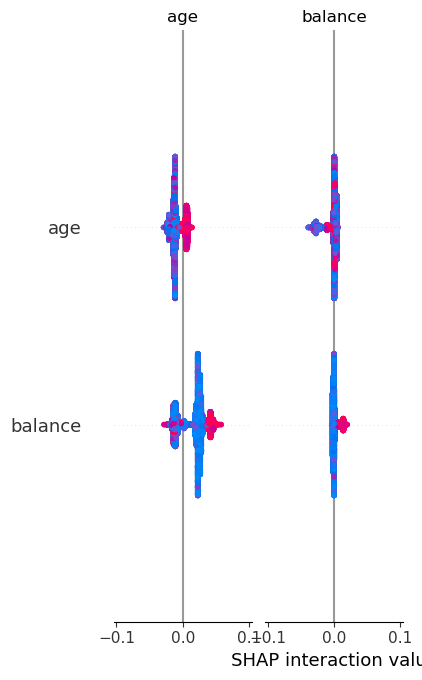

In [ ]:
shap.summary_plot(shap_values, X_train_trans)

# utils

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

def compute_roc_curve(model, testing_x, testing_y):

    # Input validation
    if model is None:
        raise ValueError("No model provided. Please provide a machine learning model.")
    if not hasattr(model, 'predict_proba'):
        raise ValueError(f"The provided model({model}) does not support probability predictions.")
    if testing_x is None or testing_y is None:
        raise ValueError("Test data and labels must not be None.")
    
    # Compute ROC curve and ROC area
    predict_prob = model.predict_proba(testing_x)
    fpr, tpr, threshold = metrics.roc_curve(testing_y, predict_prob[:,1])
    roc_auc = metrics.auc(fpr, tpr)

    return fpr, tpr, roc_auc

def compute_and_plot_roc_curve(testing_x, testing_y, figsize=(5,5), **model_dict):
    
    # Define color cycle
    custom_colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
    "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5", "#c49c94", "#f7b6d2", "#c7c7c7", "#dbdb8d", "#9edae5"
    ]
    colors = custom_colors[:len(model_dict)]

    # Plot the ROC curve
    fig, ax = plt.subplots(figsize=figsize, facecolor="white")
    ax.set_title('Receiver Operating Characteristic')
    for idx, (model_name, model) in enumerate(model_dict.items()):
        fpr, tpr, roc_auc = compute_roc_curve(model, testing_x, testing_y)
        ax.plot(fpr, tpr, label='{} : {:0.3f}'.format(model_name, roc_auc), color=colors[idx])
    ax.legend(loc='lower right')
    ax.plot([0, 1], [0, 1], 'r--')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_ylabel('True Positive Rate')
    ax.set_xlabel('False Positive Rate')
    
    return fig, ax, fpr, tpr, roc_auc

In [ ]:
from sklearn.inspection import permutation_importance

def plot_permutation_importance(clf, X, y):
    fig, ax = plt.subplots(figsize=(7, 6))
    result = permutation_importance(clf, X, y, n_repeats=10, random_state=RANDOM_STATE, n_jobs=-1)
    perm_sorted_idx = result.importances_mean.argsort()

    ax.boxplot(
        result.importances[perm_sorted_idx].T,
        vert=False,
        labels=X.columns[perm_sorted_idx],
    )
    ax.axvline(x=0, color="k", linestyle="--")
    ax.figure.tight_layout()
    plt.show()
    # return ax